✍ В этом юните мы рассмотрим первый алгоритм кластеризации — **k-means**, или, как его ещё называют, **алгоритм k-средних**. Мы подробно изучим математическую составляющую данного метода, а также разберёмся с некоторыми его нюансами.

Напомним, что **идея** алгоритма *k-means* состоит в том, что он итеративно разбивает множество объектов на заранее заданное пользователем число кластеров и стремится минимизировать расстояние от объектов внутри кластера до центроида кластера.

В результате мы получаем сгруппированные по кластерам **точки** и **центроид** (его ещё иногда называют **центром тяжести**) для каждого кластера. Визуально это может выглядеть, например, так (на графике показано разделение на четыре кластера):

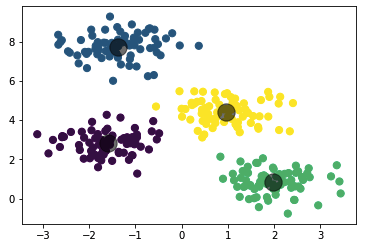

K-means является самым популярным алгоритмом. Он широко применяется для:

+ сегментации изображений;
+ сегментации хромосом;
+ выявления ботов и аномалий;
+ группировки новостных комментариев.

Далее мы повторим алгоритм k-means на простейшей визуализации, затем реализуем его самостоятельно на несложном вычислительном примере и наконец формализуем последовательность действий математически.

1. Предположим, у нас есть некоторое количество точек, расположенных на двухмерной плоскости:

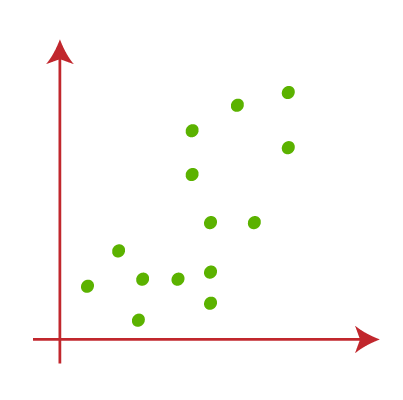

2. Будем считать, что у нас два кластера (как подбирается оптимальное число кластеров, мы обсудим позже). Выберем случайные точки, которые будут центроидами кластеров (это могут быть точки, принадлежащие нашим данным, или какие-то другие):

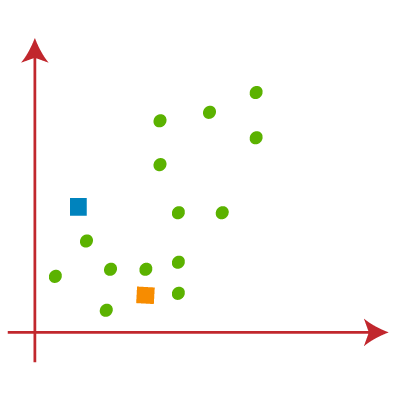

3. Теперь для каждой точки рассчитаем расстояния до обоих центроидов и отнесём её к кластеру, центроид которого находится ближе к ней:

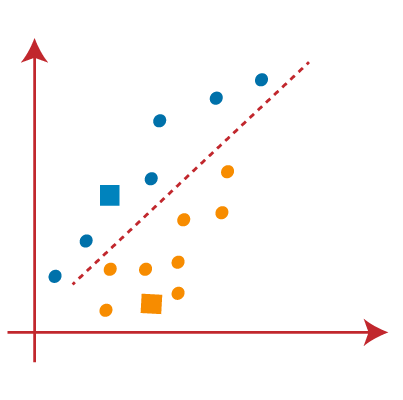

4. Для каждого кластера найдём новый центроид — такую точку, сумма квадратов расстояний до которой будет минимальной:

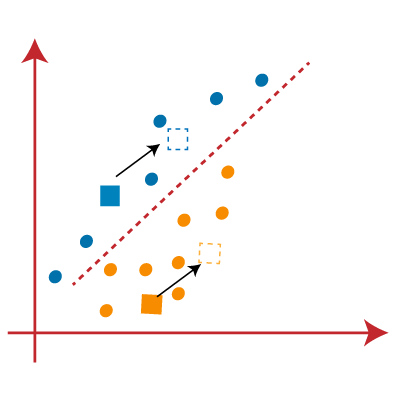

5. Далее снова рассчитаем для каждой точки расстояния до обоих центроидов и отнесём её к тому кластеру, центроид которого находится ближе к ней (в результате некоторые точки «переходят» от одного кластера к другому):

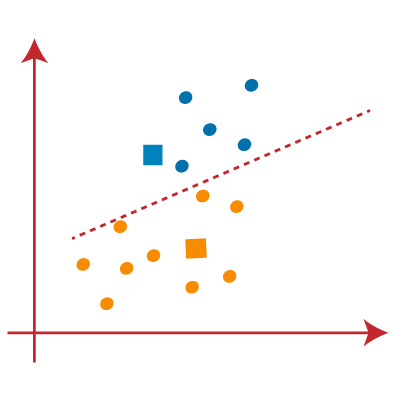

6. Мы получили новые кластеры. Теперь найдём новые центроиды для этих кластеров:

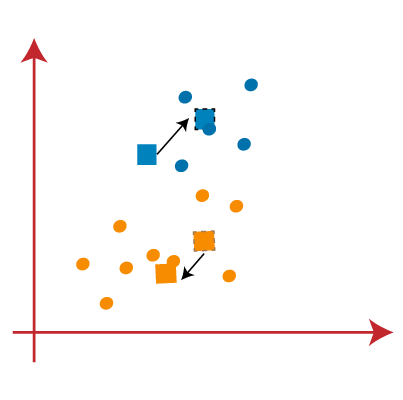

7. Повторяя данные шаги до сходимости, получаем кластеры с объектами:

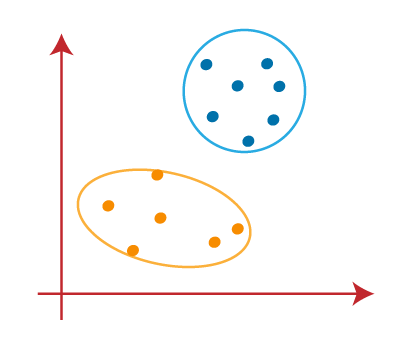

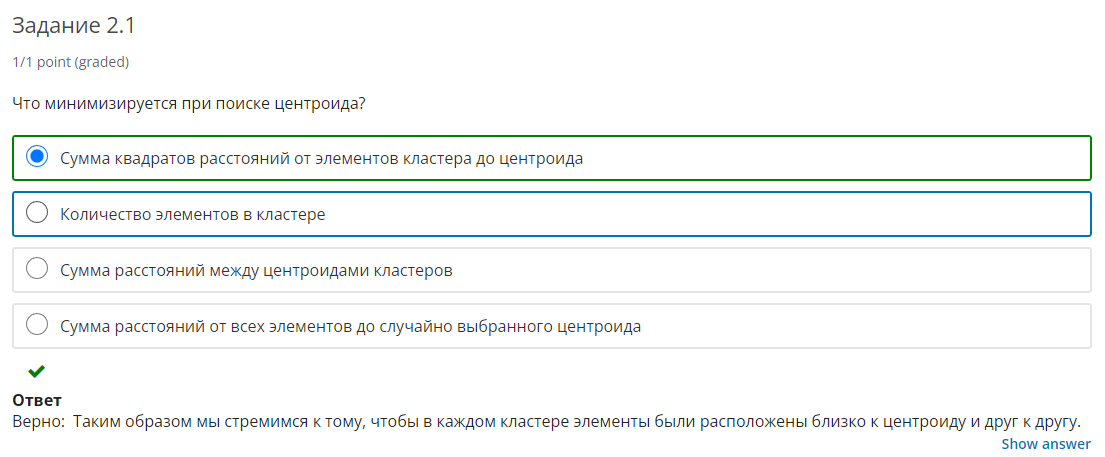

Теперь давайте реализуем k-means самостоятельно на вычислительном примере.

1. Представим, что у нас есть четыре объекта ($A$, $B$, $C$ и $D$) и для каждого из них мы знаем значения двух признаков ($x_1$ и $x_2$). Например, это могут быть ученики, набравшие соответствующее количество баллов по двум тестированиям.

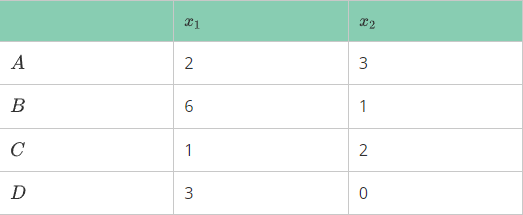

2. Будем считать, что наши данные можно разбить на два кластера (к первому отнесём $A$ и $B$, ко второму — $C$ и $D$).

Выберем два центроида по следующему принципу:
+ Первый центроид (назовём его $AB$) как среднее арифметическое для $A$ и $B$.
+ Второй центроид (назовём его $CD$) как среднее арифметическое для $C$ и $D$.

**Примечание.** Мы могли бы выбрать центроиды и по-другому (например, случайно), а потом уже определить первичный состав кластеров — именно так реализуется алгоритм k-means. Здесь же мы выбрали изначальные центроиды, отталкиваясь от некоторого предположения о распределении по кластерам — при решении задач «вручную» иногда используется такой подход.

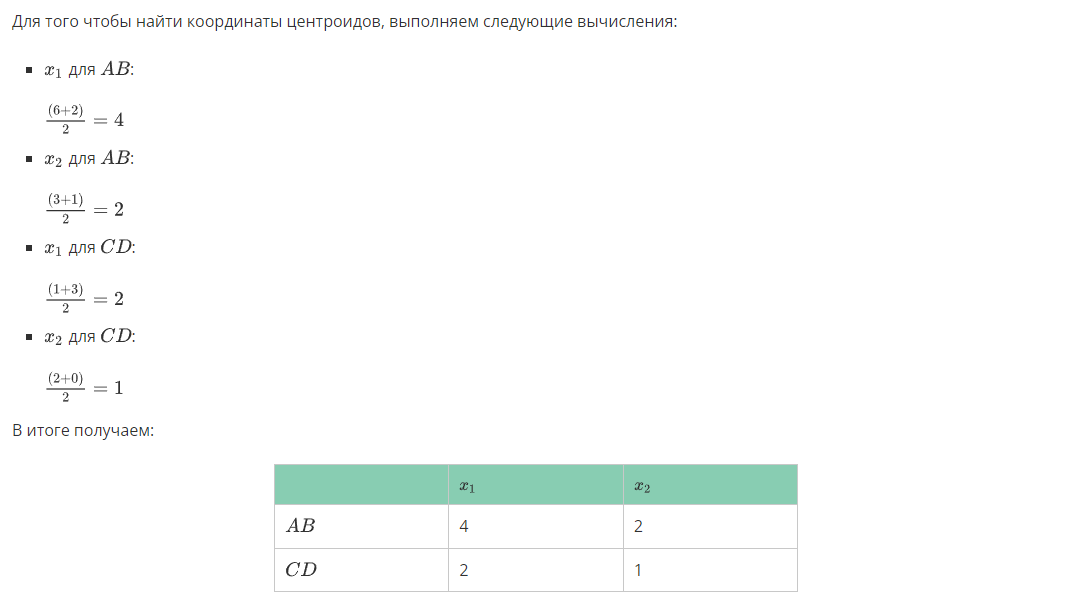

3. Теперь вычисляем квадрат евклидова расстояния от всех точек до обоих центроидов (т. е. всего восемь значений)

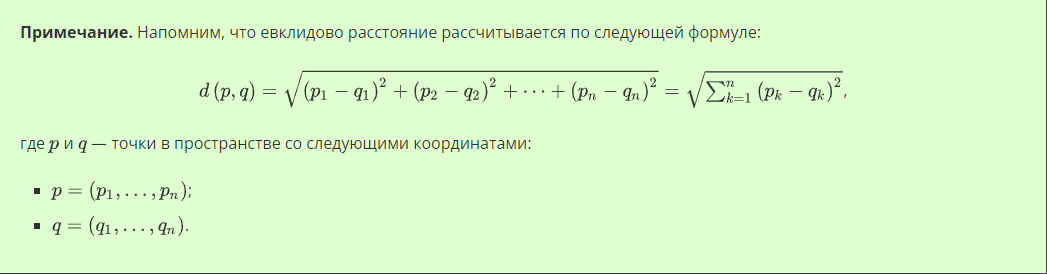

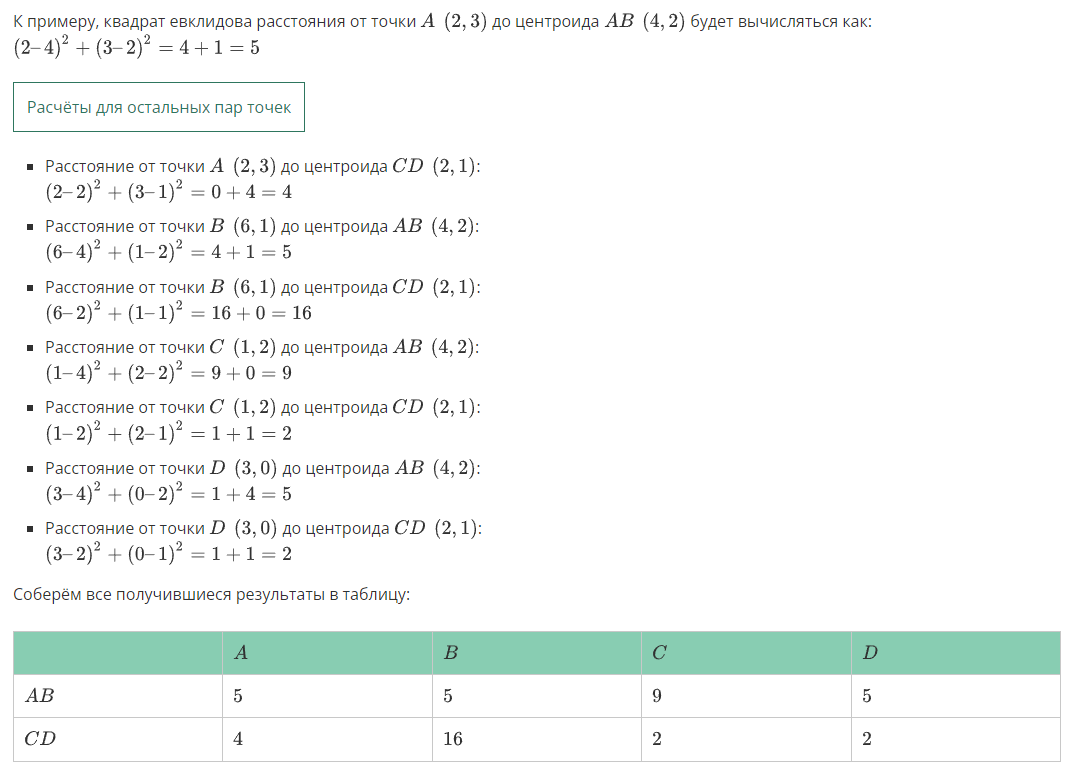

4. Если внимательно посмотреть на получившиеся расстояния, можно увидеть, что, например, расстояние от $A$ до кластера $CD$ меньше, чем расстояние от $A$ до $AB$ кластера . Поэтому перемещаем точку $A$ в кластер $CD$. Теперь у нас есть кластеры $B$ и $ACD$.

5. По аналогии с пунктом 2 данного решения пересчитаем центры кластеров как среднее арифметическое:

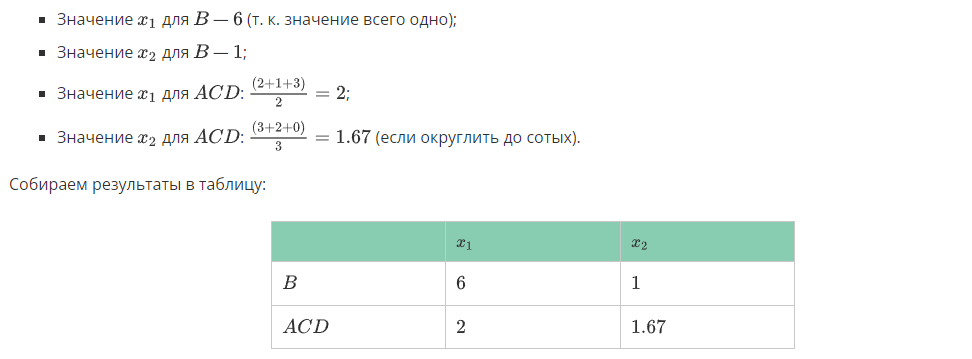

6. K-means — итеративная процедура, так что теперь снова ищем расстояния от всех точек до новых центроидов. Вычисления будут аналогичны третьему шагу решения и будут давать следующие результаты:

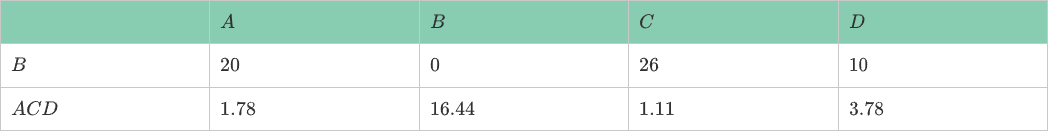

7. В таблице выше мы видим, что теперь значения оптимальны: все точки распределяются по кластерам ($B, ACD$) на основе их минимального расстояния до центроидов. На этом итеративная процедура заканчивается — мы решили задачу.

## Задание 2.2

Вы узнали, что в соседнем районе построили пять студенческих общежитий, и решили, что будет отличной идеей открыть там пару ларьков с хот-догами. Изначальное положение общежитий и ваш план относительно ларьков выглядят следующим образом:

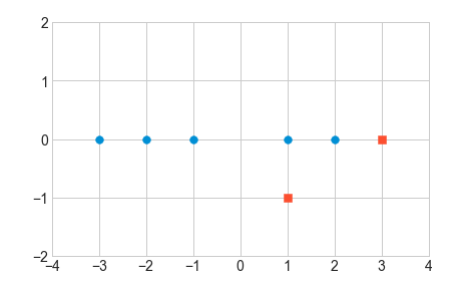

Здесь синие точки — общежития, красные — первоначальный план расположения ларьков.

Примените алгоритм k-means и найдите оптимальное расположение ларьков, чтобы расстояние до каждого из общежитий было минимальным (насколько это возможно, если ларьков всего два).

Известно, что у ларьков будут различные координаты по оси абсцисс.

Какой будет координата по оси абсцисс у ларька слева? Какой будет координата по оси абсцисс у ларька справа?

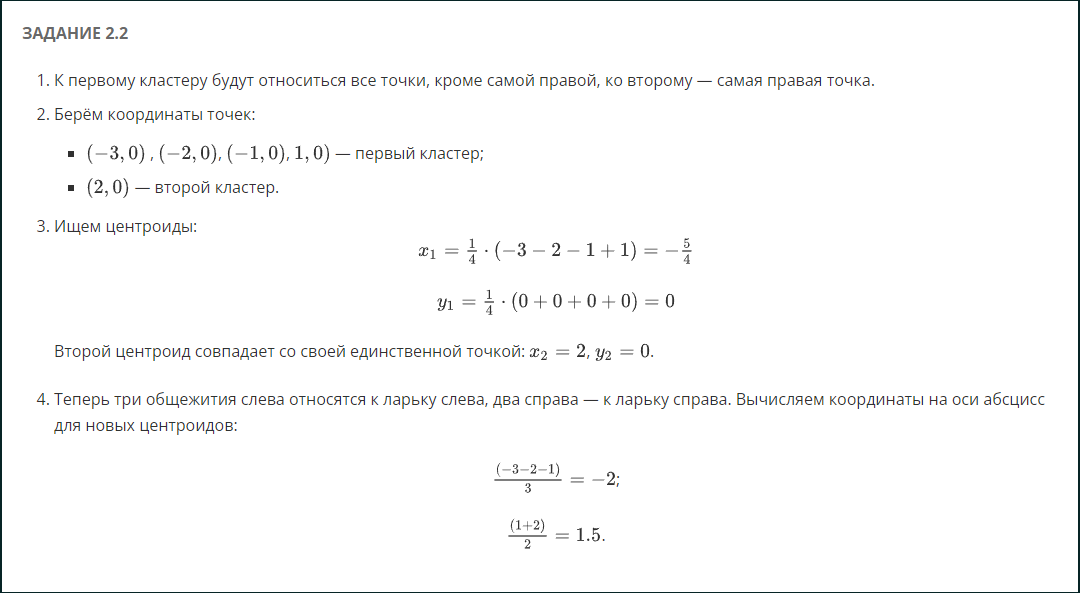


---

⭐ Отлично, мы разобрали пример решения задачи кластеризации с помощью алгоритма k-means. Теперь можно перейти к математической формулировке данного алгоритма.

---

Сначала давайте в целом сформулируем постановку задачи кластеризации:

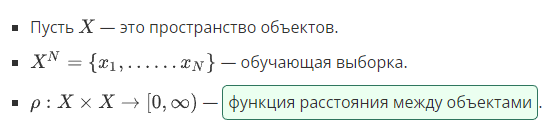

Необходимо найти:

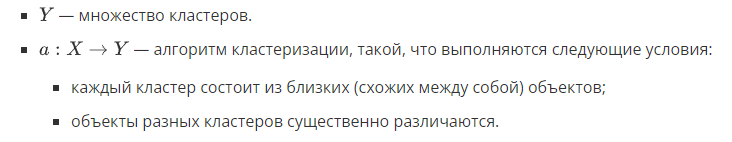

Важно сразу обозначить, что решение задачи кластеризации очень неоднозначно, так как:

+ много критериев для оценки качества (мы подробно поговорим о них в следующем модуле);
+ много эвристических (не обусловленных математической теорией) методов кластеризации;
+ обычно число кластеров неизвестно заранее (мы сами определяем его);
+ результат кластеризации сильно зависит от параметров, которые также являются эвристиками.

### Несмотря на это, кластеризация всё равно популярна и часто используется при решении прикладных задач, так как позволяет упрощать обработку данных, сокращать их объём, выделять нетипичные объекты и строить иерархию для множества объектов.

*Теперь давайте перейдём к математической составляющей алгоритма k-means.*

Будем делать это согласно следующей процедуре (она носит название **алгоритма Ллойда** — именно этот алгоритм используется в sklearn):

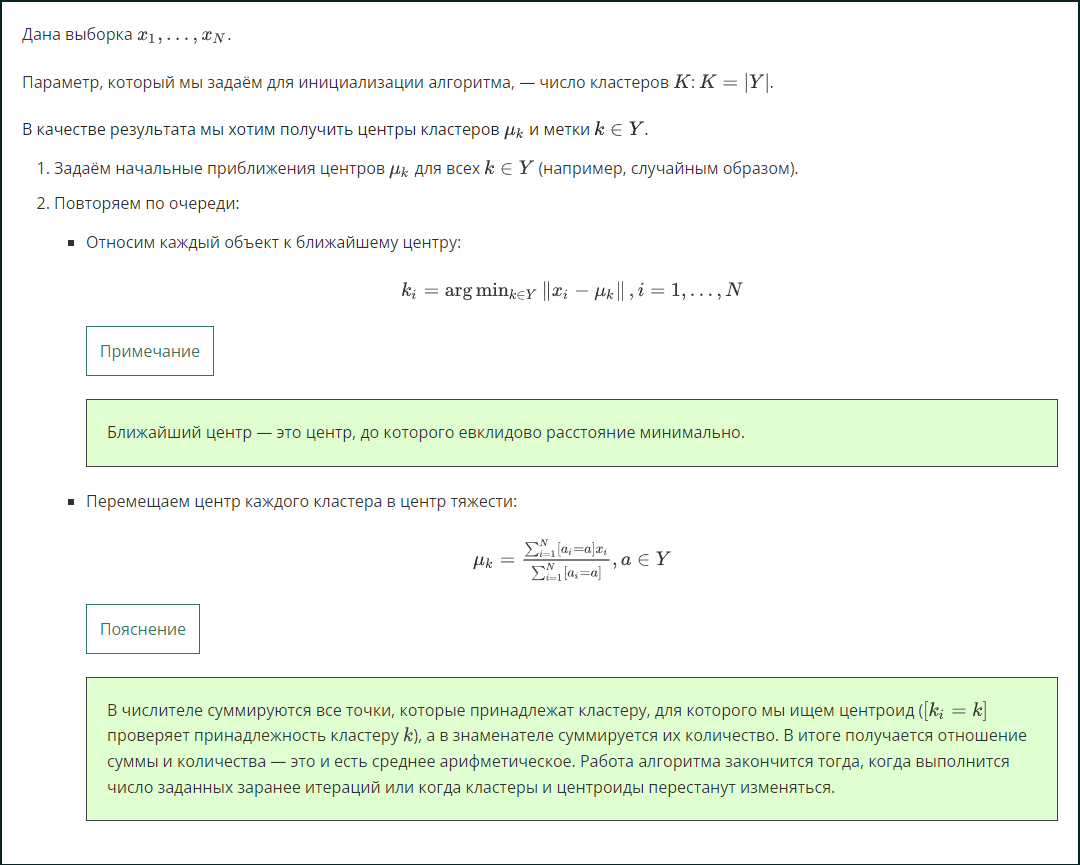

Для того чтобы запустить алгоритм кластеризации k-means, нам нужна библиотека sklearn и модуль KMeans.

Что необходимо для запуска?

+ Задать количество кластеров, на которые необходимо разделить данные.
+ Данные, т. е. параметры объектов (), которые мы будем передавать в виде матрицы наблюдений $X$.



**Пример**

```
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
```
+ n_clusters — количество кластеров;
+ n_init — количество итераций алгоритма k-means;
+ random_state — параметр для воспроизводимости результатов от запуска к запуску.

## У алгоритма k-means есть ряд недостатков:

+ число кластеров надо знать заранее;
+ очень чувствителен к первичному выбору центроидов;
+ не гарантирует достижения глобального минимума суммы квадратов расстояний, периодически «застревает» в локальном минимуме.

Также у k-means есть вариации, которые применяются в некоторых специфических случаях.

# **MINI-BATCH K-MEANS**

Данная вариация k-means используется, когда данных очень много. Из-за их объёма вычисление центров по всей выборке занимает много времени.

Для решения этой проблемы k-means на каждом шаге работает с небольшой подвыборкой данных. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим k-means. Обычно разница в кластеризации методом Mini-Batch K-means и классическим k-means заключается в пограничных точках близко расположенных кластеров:

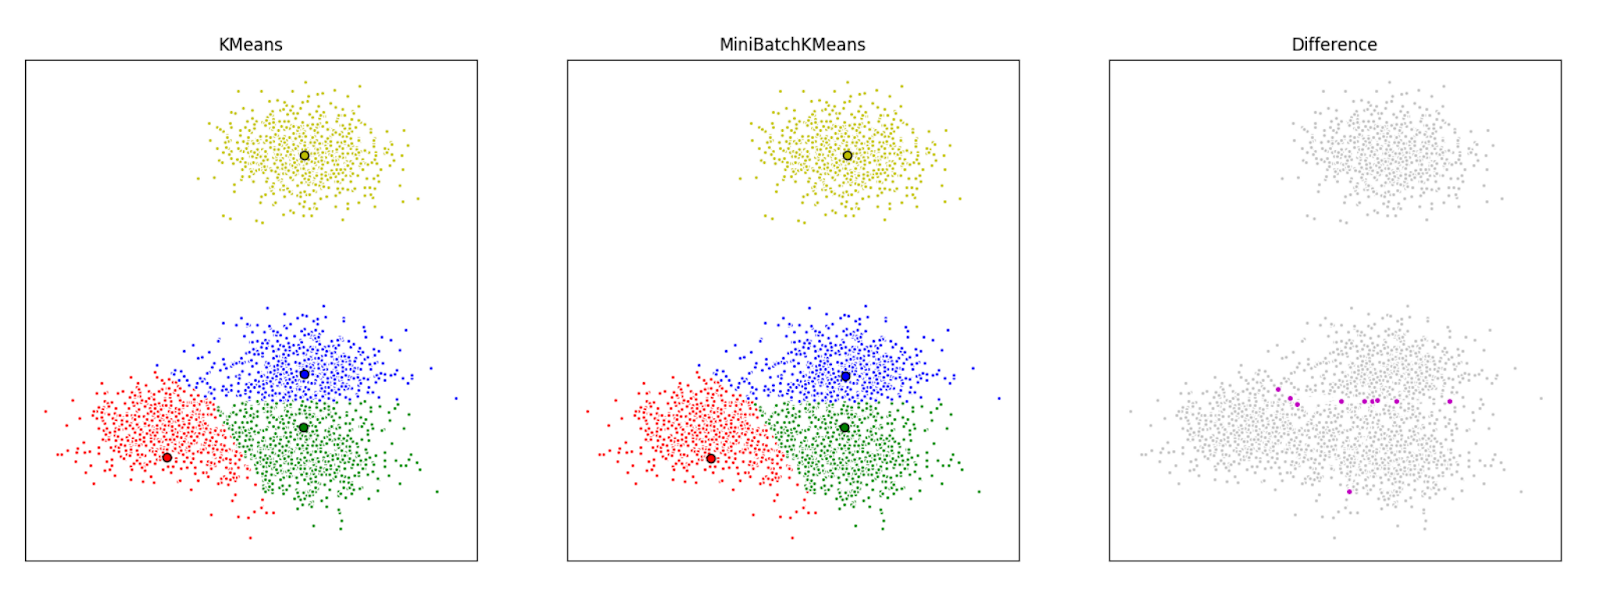

Для того чтобы запустить алгоритм кластеризации Mini-Batch K-means, нам нужна библиотека sklearn и модуль MiniBatchKMeans. Его применение и параметры аналогичны классическому Kmeans. Отличие лишь в том, что можно дополнительно настроить объём подвыборки:



```
# два кластера и подвыборки объёма 6

kmeans = MiniBatchKMeans(n_clusters=2,random_state=42,batch_size=6)
```



# **K-MEANS++**

Данную вариацию k-means используют, если признаков очень много.

Результат и время работы алгоритма зависят от изначального выбора центроидов. Чтобы минимизировать затраты, будем действовать следующим образом:

1. Первый центроид выбираем случайным образом.
2. Для каждой точки вычисляем квадрат расстояния до ближайшего центроида из тех, что уже поставлены.
3. Далее из этих точек выбираем следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния.
4. Когда все точки выбраны, реализуем k-means.

### По умолчанию при запуске k-means в sklearn используется именно алгоритм k-means++. Выбор алгоритма задаётся через параметр init:

+ init='random' — для классической версии k-means;
+ init='k-means++' — для вариации k-means++.

Итак, мы рассмотрели алгоритм реализации кластеризации, и, надеемся, теперь он вам полностью понятен. Однако остался важный вопрос: как определить количество кластеров?

Ниже можно увидеть формулу суммы квадратов всех расстояний от точек $x_i$ до центров кластеров $C_k$ ,к которым принадлежат данные точки. Это значение ещё называют **инерцией**.

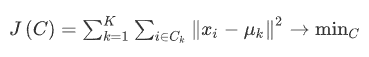

При реализации алгоритма k-means для получения значения инерции используется атрибут inertia_. Например, в одном из предыдущих модулей мы создавали функцию, чтобы находить значения инерции для разного количества кластеров:



```
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia
```




Разумеется, чем меньше эта величина, тем лучше. Однако здесь есть большая проблема: минимальное значение этой функции будет достигаться тогда, когда количество кластеров будет равняться количеству объектов (т. е. каждый кластер будет состоять из одной точки и расстояния будут нулевыми). Это уже будет ситуация переобучения, так как алгоритм чересчур сильно подстроится под данные.

Для решения этой проблемы была выведена следующая эвристика: берётся такое число кластеров, начиная с которого значение функционала $J(C)$ уменьшается уже не так быстро. Формально это можно записать следующим образом:

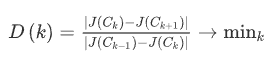

Визуально это можно представить так:

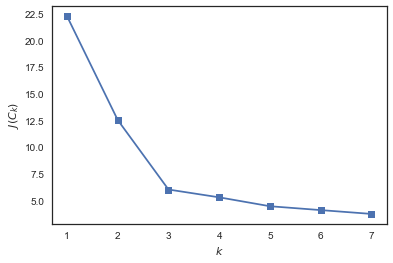

Можно увидеть, что инерция очень сильно уменьшается при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так значительно — при изменении $k$ с 3 до 4. То есть перегиб здесь находится в точке 3, и это значит, что три кластера — оптимальный вариант.

### Однако важно отметить, что с помощью метода локтя не всегда получается определить оптимальное количество кластеров, так как не всегда есть этот перегиб. Как быть в таком случае? Какое оптимальное количество кластеров выбрать?

Если в ходе решения задачи вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

Для того чтобы его вычислить, используется следующая формула:

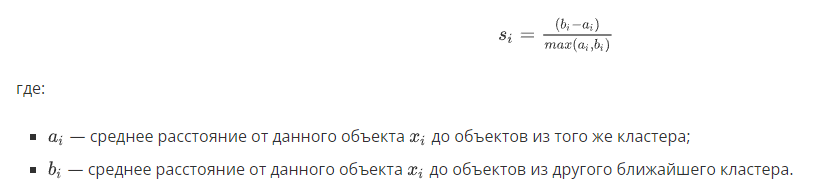

Для вычисления коэффициента силуэта используется silhouette_score. Вспомним функцию из предыдущего модуля по кластеризации, которую мы использовали для расчёта значений коэффициента силуэта для разного количества кластеров:

```
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))
```

Коэффициент силуэта обладает следующими свойствами:

+ Значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами.
+ Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной.
+ Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много/мало или данные просто плохо поддаются разделению на кластеры.

Для получения итогового значения рассчитывается среднее значение силуэта для всего датасета.

Соответственно, для определения оптимального количества кластеров мы будем искать самую высокую точку на графике коэффициента силуэта (ведь чем больше коэффициент, тем лучше). Например, здесь наиболее подходящее количество кластеров — 3:

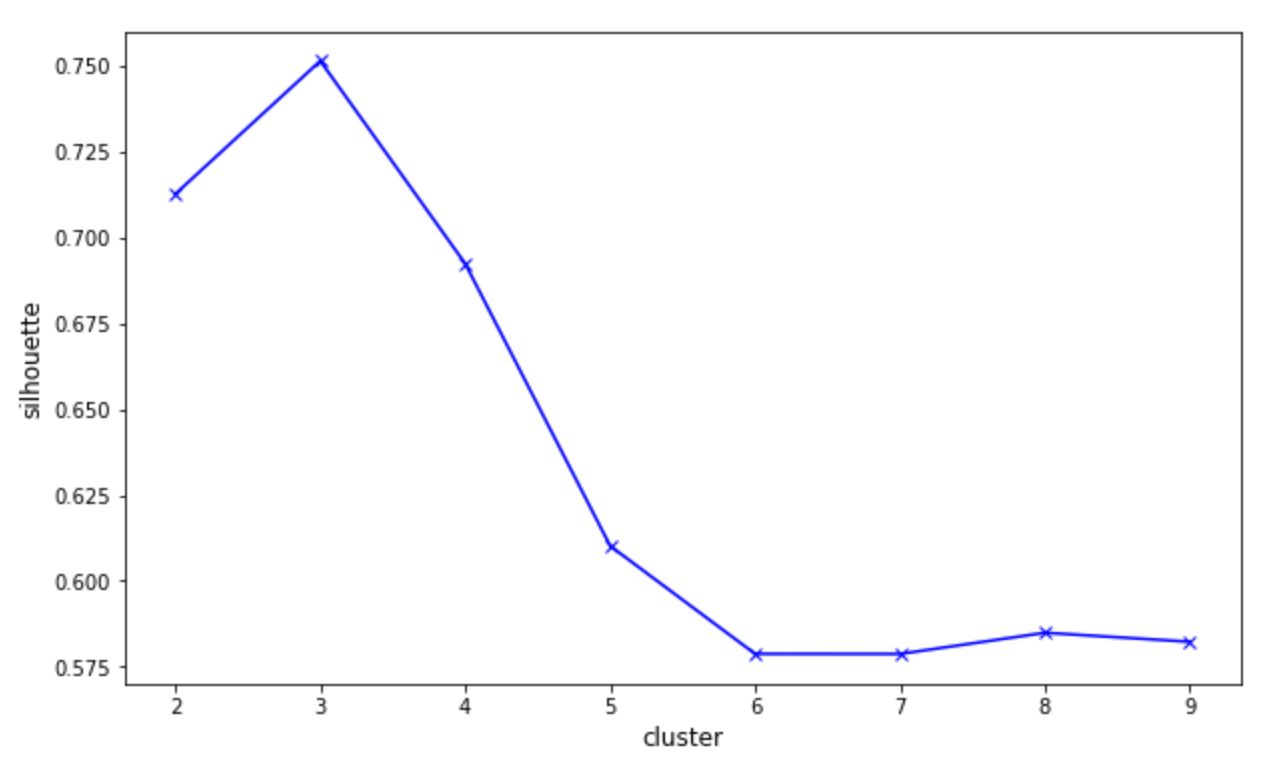

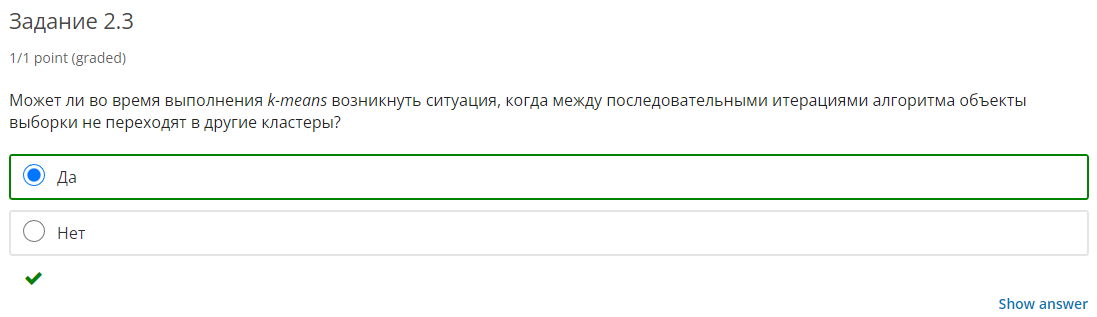

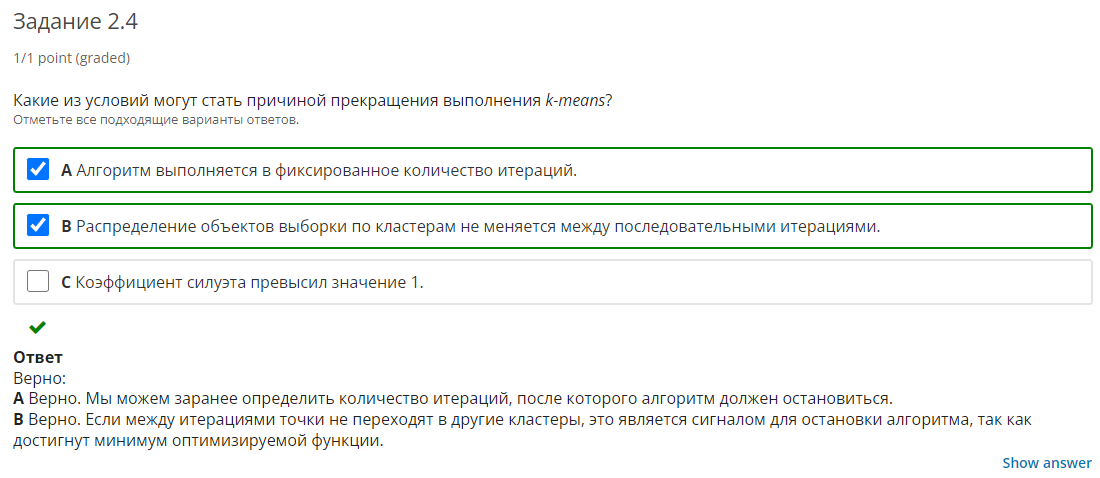

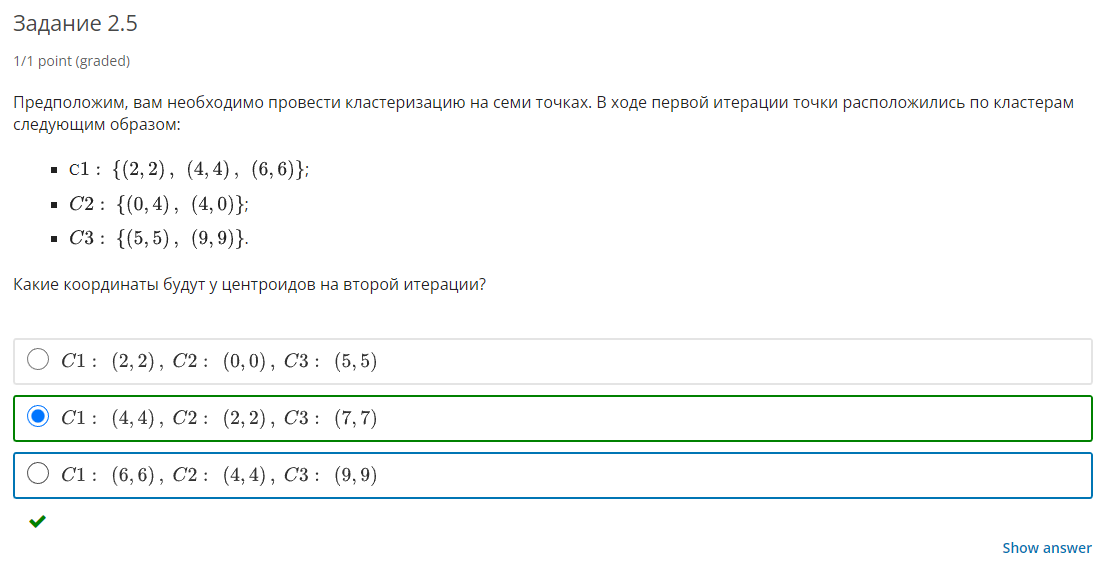
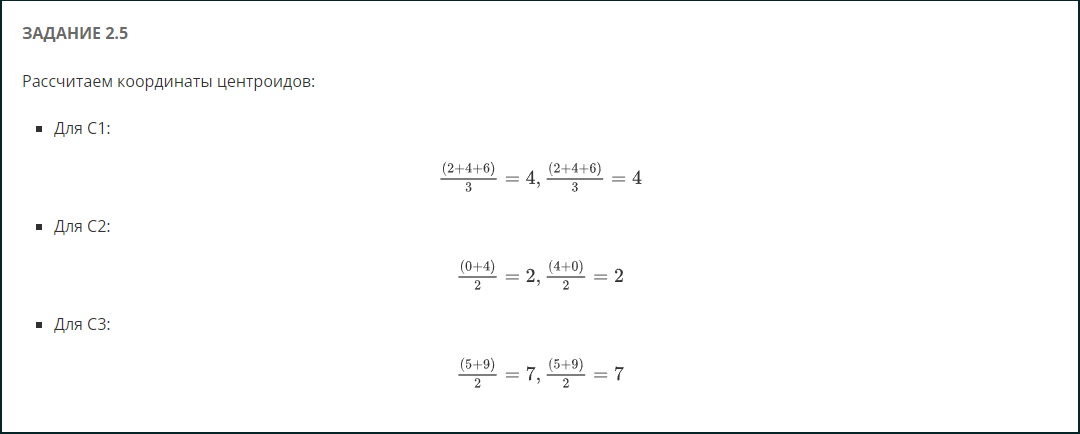

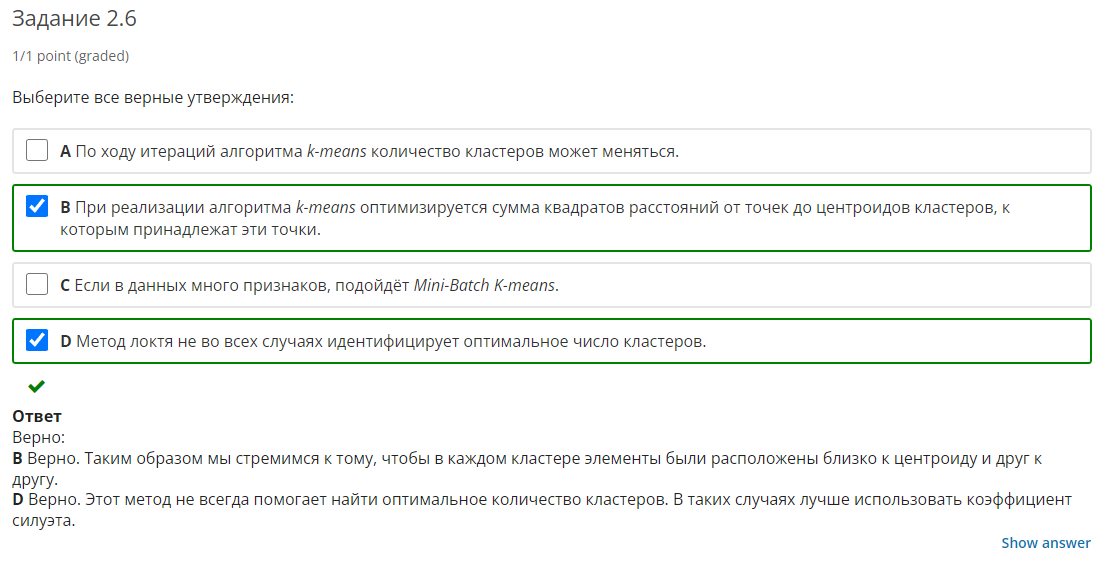

### ⭐ Итак, мы подробно разобрали, как работает алгоритм k-means, узнали, какие у него есть вариации и как найти оптимальное количество кластеров. Теперь вы можете решить задачу кластеризации с использованием данного метода и чётко понимаете, какими будут действия на каждой итерации. В следующем юните мы подробно рассмотрим EM-алгоритм, а после потренируемся применять изученные алгоритмы на практической задаче →